In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
#import python dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pylab
import matplotlib.ticker as ticker
from matplotlib import dates

In [28]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [5]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement & station classes to local variables
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

In [9]:
# Display the row's columns and data in dictionary format
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10b9e6160>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10b9e6dd8>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

Precipitation Analysis

In [11]:
#Find the date 12 months from the present
year_ago = dt.date.today() - dt.timedelta(days=365)
year_ago

datetime.date(2017, 1, 2)

In [12]:
results = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date > year_ago).\
            order_by(measurement.date).all()

In [13]:
# Unpack the `date` and `precipitation` from results and save into separate lists
date = [result[0] for result in results]
prcp = [float(result[1]) for result in results]

In [14]:
results

[('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.18),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-05', 0.42),
 ('2017-01-05', 0.06),
 ('2017-01-05', 0.47),
 ('2017-01-06', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-06', 0.59),
 ('2017-01-06', 0.01),
 ('2017-01-06', 0.1),
 ('2017-01-06', 0.1),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.06),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.03),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.03),
 ('2017-01-09', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-10', 0.0),
 

In [15]:
date_new = pylab.datestr2num(date)
formatter = dates.DateFormatter('%Y-%m-%d')

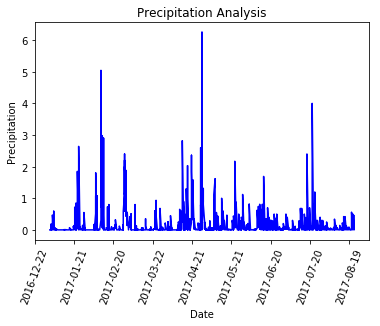

In [16]:
fig, ax = plt.subplots()
ax.plot(date_new,prcp,color='b')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 30))

plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Analysis")

ax.xaxis.set_major_formatter(formatter)
plt.style.use('ggplot')
plt.show()

Station Analysis

Design a query to calculate the total number of stations.

In [17]:
station_count = session.query(station).count()
station_count

9

Design a query to find the most active stations

In [18]:
sel = [measurement.station, station.name, func.count(measurement.station)]
for row in  session.query(*sel)\
            .group_by(measurement.station).order_by(func.count(measurement.station).desc())\
            .filter(measurement.station == station.station):
    print(row)

('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00513117', 'KANEOHE 838.1, HI US', 2696)
('USC00519397', 'WAIKIKI 717.2, HI US', 2685)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932)
('USC00517948', 'PEARL CITY, HI US', 683)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)


In [29]:
session.query(station.name).group_by(measurement.station).order_by(func.count(measurement.station).desc()).filter(measurement.station == station.station)

In [19]:
#highest number of observations
session.query(*sel)\
.group_by(measurement.station).order_by(func.count(measurement.station).desc())\
.filter(measurement.station == station.station).first()

('USC00519281', 'WAIHEE 837.5, HI US', 2772)

Design a query to retrieve the last 12 months of temperature observation data (tobs).

In [20]:
sel = [measurement.date, func.count(measurement.tobs), func.avg(measurement.tobs)]
for row in  session.query(*sel).\
            filter(measurement.date > year_ago)\
            .group_by(measurement.station).order_by(func.count(measurement.tobs).desc()):
    print(row)

('2017-08-23', 228, 75.0219298245614)
('2017-08-18', 219, 72.15525114155251)
('2017-07-31', 210, 72.54761904761905)
('2017-08-23', 202, 71.93564356435644)
('2017-08-23', 190, 76.77368421052631)
('2017-08-23', 165, 77.01818181818182)
('2017-07-28', 43, 72.74418604651163)


In [21]:
#Find station with the highest number of observations
sel = [measurement.station, func.count(measurement.tobs)]
for row in  session.query(*sel).\
            filter(measurement.date > year_ago)\
            .group_by(measurement.station).order_by(func.count(measurement.tobs).desc()):
    print(row)

('USC00519397', 228)
('USC00519281', 219)
('USC00513117', 210)
('USC00516128', 202)
('USC00519523', 190)
('USC00514830', 165)
('USC00517948', 43)


In [22]:
#Get tobs for "USC00519397" station which has the highest number of observations
sel = [measurement.station, measurement.date, measurement.tobs]
for row in  session.query(*sel).\
            filter(measurement.date > year_ago).\
            filter(measurement.station == "USC00519397"):
     print(row)

('USC00519397', '2017-01-03', 63)
('USC00519397', '2017-01-04', 62)
('USC00519397', '2017-01-05', 63)
('USC00519397', '2017-01-06', 64)
('USC00519397', '2017-01-07', 66)
('USC00519397', '2017-01-08', 60)
('USC00519397', '2017-01-09', 64)
('USC00519397', '2017-01-10', 63)
('USC00519397', '2017-01-11', 78)
('USC00519397', '2017-01-12', 67)
('USC00519397', '2017-01-13', 67)
('USC00519397', '2017-01-14', 65)
('USC00519397', '2017-01-15', 66)
('USC00519397', '2017-01-16', 67)
('USC00519397', '2017-01-17', 66)
('USC00519397', '2017-01-18', 72)
('USC00519397', '2017-01-19', 73)
('USC00519397', '2017-01-20', 71)
('USC00519397', '2017-01-21', 72)
('USC00519397', '2017-01-22', 72)
('USC00519397', '2017-01-23', 72)
('USC00519397', '2017-01-24', 69)
('USC00519397', '2017-01-25', 72)
('USC00519397', '2017-01-26', 71)
('USC00519397', '2017-01-27', 65)
('USC00519397', '2017-01-28', 64)
('USC00519397', '2017-01-29', 67)
('USC00519397', '2017-01-30', 67)
('USC00519397', '2017-01-31', 68)
('USC00519397'

In [23]:
#Put the results into a data-frame
results = session.query(*sel).\
            filter(measurement.date > year_ago).\
            filter(measurement.station == "USC00519397")
tobs_df = pd.DataFrame(results[:], columns=['station', 'date', 'tobs'])
tobs_df.head()

,station,date,tobs
0,USC00519397,2017-01-03,63
1,USC00519397,2017-01-04,62
2,USC00519397,2017-01-05,63
3,USC00519397,2017-01-06,64
4,USC00519397,2017-01-07,66


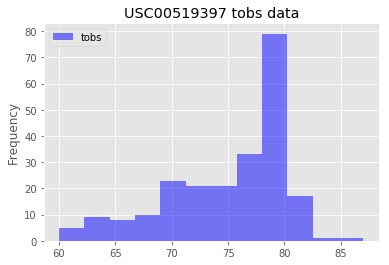

In [24]:
num_bins = 12
n, bins, patches = plt.hist(tobs_df["tobs"], num_bins, facecolor='blue', alpha=0.5, label = "tobs")

plt.ylabel("Frequency")
plt.legend(loc='upper left')
plt.title("USC00519397 tobs data")

plt.show()

Temperature Analysis

In [32]:
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62, 69.3921568627451, 74)]


In [26]:
results = calc_temps('2012-02-28', '2012-03-05')
#unpack tuple
temp_min, temp_avg , temp_max = results[0]

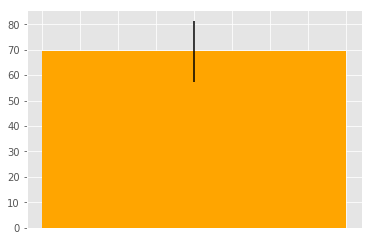

In [27]:
plt.bar(0, temp_avg, color = "orange")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

plt.errorbar(0, temp_avg, yerr = (temp_max - temp_min), color = "black")
plt.show()